In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2

print("Libraries are working!")


Libraries are working!


Found 6345 images belonging to 24 classes.
Found 3564 images belonging to 24 classes.
Number of classes: 24


C:\Users\jomar zaulda\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step - accuracy: 0.3598 - loss: 2.0474

C:\Users\jomar zaulda\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


199/199 ━━━━━━━━━━━━━━━━━━━━ 104s 518ms/step - accuracy: 0.3609 - loss: 2.0435 - val_accuracy: 0.8864 - val_loss: 0.3601
Epoch 2/25
199/199 ━━━━━━━━━━━━━━━━━━━━ 33s 166ms/step - accuracy: 0.9068 - loss: 0.2890 - val_accuracy: 0.9593 - val_loss: 0.1327
Epoch 3/25
199/199 ━━━━━━━━━━━━━━━━━━━━ 33s 167ms/step - accuracy: 0.9563 - loss: 0.1439 - val_accuracy: 0.9644 - val_loss: 0.0991
Epoch 4/25
199/199 ━━━━━━━━━━━━━━━━━━━━ 33s 164ms/step - accuracy: 0.9655 - loss: 0.1016 - val_accuracy: 0.9910 - val_loss: 0.0343
Epoch 5/25
199/199 ━━━━━━━━━━━━━━━━━━━━ 32s 163ms/step - accuracy: 0.9822 - loss: 0.0548 - val_accuracy: 0.9994 - val_loss: 0.0068
Epoch 6/25
199/199 ━━━━━━━━━━━━━━━━━━━━ 34s 169ms/step - accuracy: 0.9920 - loss: 0.0273 - val_accuracy: 0.9700 - val_loss: 0.1121
Epoch 7/25
199/199 ━━━━━━━━━━━━━━━━━━━━ 32s 163ms/step - accuracy: 0.9629 - loss: 0.1108 - val_accuracy: 0.9321 - val_loss: 0.2113
Epoch 8/25
199/199 ━━━━━━━━━━━━━━━━━━━━ 33s 167ms/step - accuracy: 0.9617 - loss: 0.1138 - va

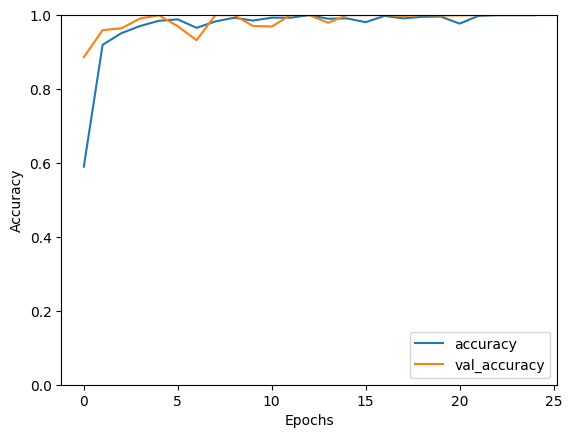

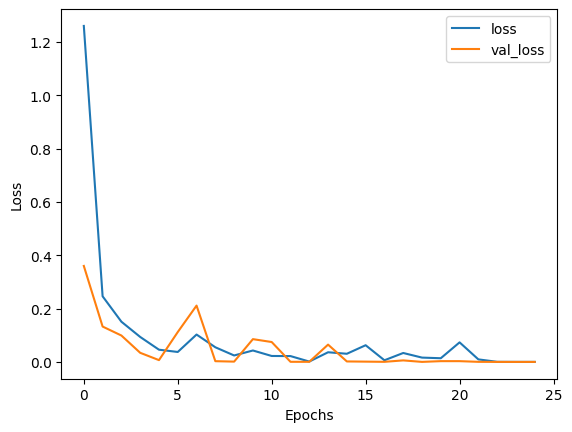

In [ ]:
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Step 2: Load and preprocess the data
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

# Define the paths to your dataset
train_path = "C:\\Users\\jomar zaulda\\Desktop\\fruits-360_dataset_original-size\\fruits-360-original-size\\Training"
test_path = "C:\\Users\\jomar zaulda\\Desktop\\fruits-360_dataset_original-size\\fruits-360-original-size\\Test"

train_set = train_datagen.flow_from_directory(train_path, target_size=(64, 64), batch_size=32, class_mode='categorical')
test_set = test_datagen.flow_from_directory(test_path, target_size=(64, 64), batch_size=32, class_mode='categorical')

# Check number of classes
num_classes = len(train_set.class_indices)
print(f"Number of classes: {num_classes}")  # Should print 21 or the correct number of classes

# Step 3: Build the Convolutional Neural Network (CNN) model
model = Sequential()

# Convolutional layers
model.add(Input(shape=(64, 64, 3)))  # Input layer
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the data for the fully connected layers
model.add(Flatten())

# Fully connected layers
model.add(Dense(units=128, activation='relu'))

# Output layer: update the number of units to match the number of classes (21)
model.add(Dense(units=num_classes, activation='softmax'))

# Step 4: Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 5: Train the model
history = model.fit(train_set, epochs=25, validation_data=test_set)

# Step 6: Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_set)
print(f"Test accuracy: {test_acc * 100:.2f}%")

# Step 7: Visualize training accuracy and loss
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# Step 8: Visualize training and validation loss
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

# Save the model
model.save('fruit_model.keras') 



In [4]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the image you want to predict
img_path = "C:\\Users\\jomar zaulda\\Downloads\\pear.jpg" # Replace with the path to the image
img = image.load_img(img_path, target_size=(64, 64))  # Make sure the size matches the input size (64x64)

# Convert the image to an array and add a batch dimension (model expects a batch of images)
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

# Normalize the image (if you applied normalization during training)
img_array = img_array / 255.0

# Predict the class
predictions = model.predict(img_array)

# Get the predicted class
predicted_class = np.argmax(predictions, axis=1)[0]

# Mapping of class indices to fruit names (use the actual class names as they appear in your dataset)
class_names = list(train_set.class_indices.keys())  # Get the class names (fruit types)

# Function to clean class name (removing extra details like varieties or conditions)
def clean_class_name(class_name):
    # Extract the main fruit name by removing extra details (e.g., apple_hit_1 -> apple)
    fruit_name = class_name.split('_')[0].capitalize()  # Capitalizing the first letter for a proper name
    return fruit_name

# Get the predicted fruit name (cleaned)
predicted_fruit = clean_class_name(class_names[predicted_class])

# Mapping fruit classes to their origin (custom mapping, you can modify based on your knowledge)
fruit_origin = {
    'Apple': 'Central Asia',
    'Banana lady finger': 'Southeast Asia',
    'Cherry': 'Turkey',
    'Grape': 'Near East',
    'Lemon': 'Asia',
    'Mango': 'South Asia',
    'Orange': 'Southeast Asia',
    'Papaya': 'Southern Mexico',
    'Peach': 'China',
    'Pear': 'China',
    'Pineapple': 'South America',
    'Plum': 'China',
    'Strawberry': 'Europe and North America',
    'Watermelon': 'Africa',
    'Avocado' : ' Western hemisphere from Mexico',
    # Add the rest of your fruit classes and their origins here
}

# Get the origin for the predicted fruit
origin = fruit_origin.get(predicted_fruit, "Origin not found")

# Output only the predicted fruit and its origin
print(f"Predicted fruit: {predicted_fruit}")
print(f"Origin: {origin}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted fruit: Pear
Origin: China


In [10]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam


In [27]:
from tensorflow.keras.models import load_model

# Load the saved .h5 model
model = load_model('fruit_model.keras')


In [11]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load and preprocess the image (example)
img_path = "C:\\Users\\jomar zaulda\\Downloads\\apples.jpeg"  # Path to the image
img = image.load_img(img_path, target_size=(64, 64))  # Resize to match input shape
img_array = image.img_to_array(img)  # Convert to array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.0  # Normalize if required

# Predict the class
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions[0])  # Get class index

# Get class names from training data
class_names = list(train_set.class_indices.keys())  # Assumes train_set is still available
print(f"Predicted class: {class_names[predicted_class]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predicted class: apple_pink_lady_1


In [6]:
test_loss, test_accuracy = model.evaluate(test_set)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")


112/112 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - accuracy: 1.0000 - loss: 7.7605e-05
Test accuracy: 100.00%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


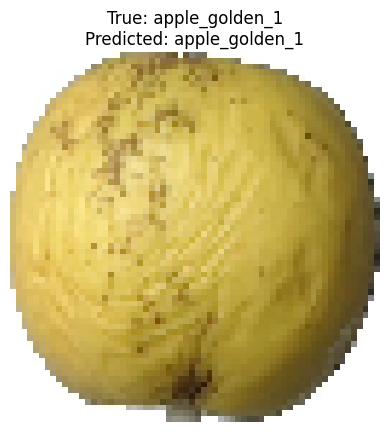

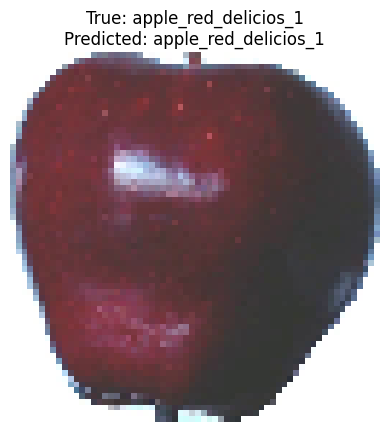

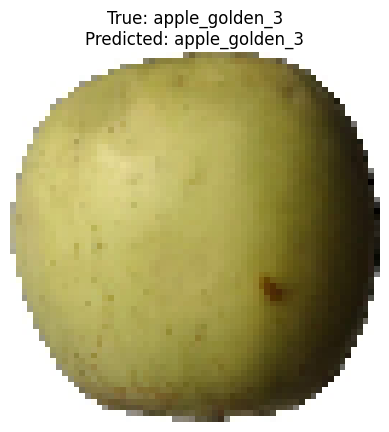

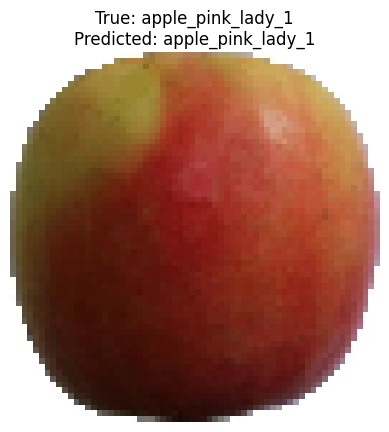

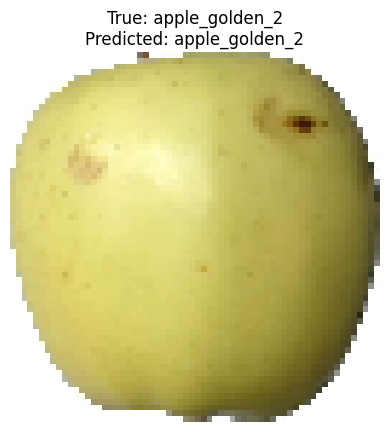

In [7]:
import matplotlib.pyplot as plt

# Load a batch of test images
test_images, test_labels = next(test_set)

# Predict on a batch
predictions = model.predict(test_images)

# Plot the first 5 images with their predicted and true labels
for i in range(5):
    plt.imshow(test_images[i])
    plt.title(f"True: {class_names[np.argmax(test_labels[i])]}\nPredicted: {class_names[np.argmax(predictions[i])]}")
    plt.axis('off')
    plt.show()


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)                   │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_24 (MaxPooling2D)      │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_25 (MaxPooling2D)      │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_26 (MaxPooling2D)      │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 128)                 │         589,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 24)                  │           3,096 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 686,296 (2.62 MB)

 Trainable params: 686,296 (2.62 MB)

 Non-trainable params: 0 (0.00 B)